In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('../data/wineQuality(cleaned).csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
count,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000
mean,6.998910,0.304193,0.322007,5.222832,0.043254,122.887837,3.232838,0.484770,10.893003,6.000000
std,0.833557,0.098368,0.095496,4.153837,0.015323,46.126618,0.135404,0.100209,1.298396,2.000062
min,3.900000,0.080000,0.000000,0.600000,0.009000,6.000000,2.790000,0.220000,8.000000,3.000000
25%,6.494757,0.240000,0.270000,1.901441,0.032256,96.020477,3.140000,0.410608,9.768544,4.000000
50%,6.941822,0.285000,0.323793,3.662232,0.040629,119.869706,3.236642,0.470000,10.900000,6.000000
75%,7.453547,0.350000,0.380000,7.600000,0.051000,153.000000,3.327522,0.543345,12.059790,8.000000
max,9.300000,0.620000,0.600000,18.050000,0.105000,260.000000,3.640000,0.820000,14.000000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         16079 non-null  float64
 1   volatile acidity      16079 non-null  float64
 2   citric acid           16079 non-null  float64
 3   residual sugar        16079 non-null  float64
 4   chlorides             16079 non-null  float64
 5   total sulfur dioxide  16079 non-null  float64
 6   pH                    16079 non-null  float64
 7   sulphates             16079 non-null  float64
 8   alcohol               16079 non-null  float64
 9   quality               16079 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

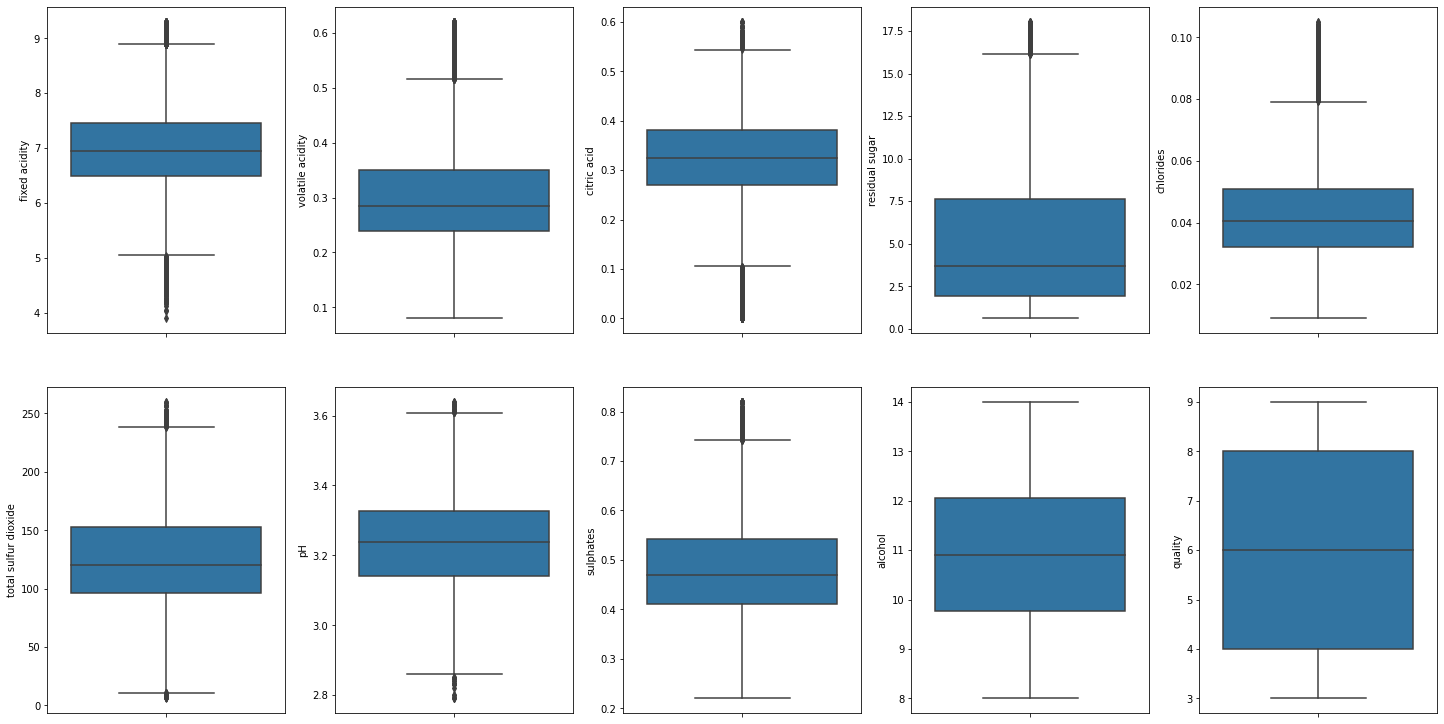

In [6]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [7]:
cd ..

/home/hrach2003/Projects/HTI_ML/WineQuality/WineQualityML/src


In [8]:
from utils import classify
from models import Classifier

## Correlation Matrix

<AxesSubplot:>

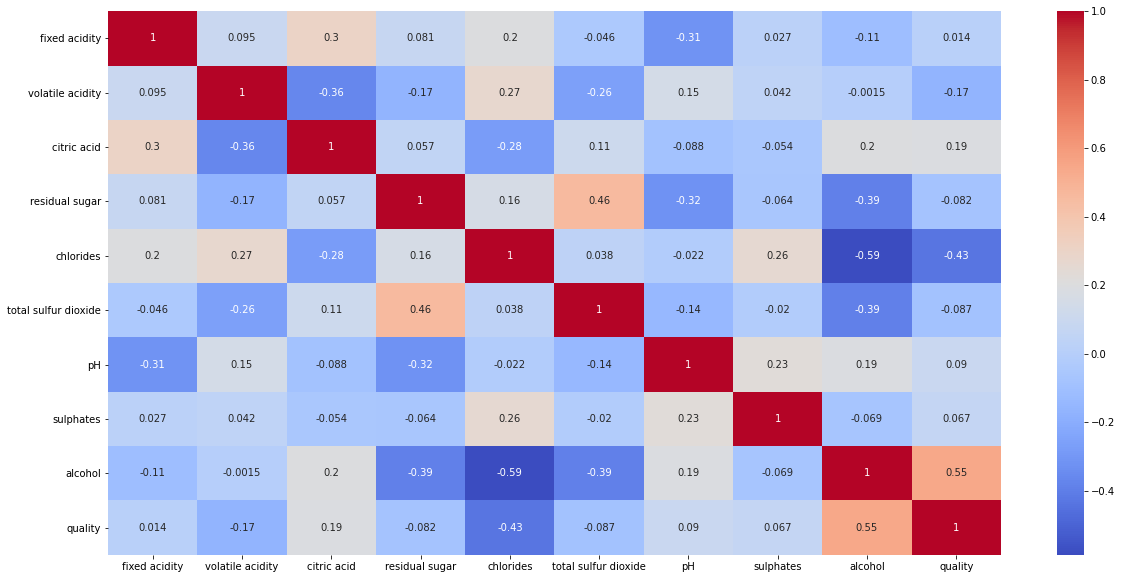

In [9]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [10]:
X = df.drop(columns=['quality'])
y = df['quality']

In [11]:
y.value_counts()

8    2297
9    2297
3    2297
4    2297
5    2297
6    2297
7    2297
Name: quality, dtype: int64

This dataset will be perfect for **Trees Family**, but with higher chance of overfitting

# Picking Models 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# Classifier is just models wrapper
classifier = Classifier(
        LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), 
        RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier()
        )

['LogisticRegression()', 'KNeighborsClassifier()', 'DecisionTreeClassifier()', 'RandomForestClassifier()', 'ExtraTreesClassifier()', 'GradientBoostingClassifier()']


## Trying to fit models without PCA simplification

In [15]:
classifier.fit(x_train, y_train)

{'LogisticRegression()': LogisticRegression(),
 'KNeighborsClassifier()': KNeighborsClassifier(),
 'DecisionTreeClassifier()': DecisionTreeClassifier(),
 'RandomForestClassifier()': RandomForestClassifier(),
 'ExtraTreesClassifier()': ExtraTreesClassifier(),
 'GradientBoostingClassifier()': GradientBoostingClassifier()}

In [16]:
y_pred_arr = classifier.predict(x_test)

for y_pred, name in y_pred_arr:
    print(name)
    print(classification_report(y_pred, y_test))


LogisticRegression()
              precision    recall  f1-score   support

           3       0.15      0.18      0.17       372
           4       0.42      0.29      0.35       653
           5       0.17      0.20      0.18       394
           6       0.08      0.22      0.11       172
           7       0.03      0.23      0.06        62
           8       0.52      0.33      0.41       733
           9       0.67      0.37      0.48       830

    accuracy                           0.29      3216
   macro avg       0.29      0.26      0.25      3216
weighted avg       0.42      0.29      0.33      3216

KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.94      0.78      0.85       537
           4       0.91      0.74      0.82       566
           5       0.58      0.67      0.62       402
           6       0.30      0.59      0.40       239
           7       0.75      0.72      0.73       450
           8       0.93      0.85 

In [17]:
results = {
    'Accuracy': [],
    "CV Score": []
}
for name, score in classifier.CV_score(X, y):
    print(name, score)
    results['CV Score'].append(score)
    
print('-----------')    
for name, score in classifier.score(x_test, y_test):
    print(name, score)
    results['Accuracy'].append(score)

    


LogisticRegression() 28.384780993941643
KNeighborsClassifier() 74.0470180203183
DecisionTreeClassifier() 76.70875792112533
RandomForestClassifier() 83.28881254690776
ExtraTreesClassifier() 84.1097622308365
GradientBoostingClassifier() 71.34779639903128
-----------
LogisticRegression() 29.291044776119403
KNeighborsClassifier() 76.86567164179104
DecisionTreeClassifier() 81.68532338308458
RandomForestClassifier() 89.08582089552239
ExtraTreesClassifier() 89.6455223880597
GradientBoostingClassifier() 75.90174129353234


In [18]:
model_results = pd.DataFrame.from_dict(results).T
model_results.columns = classifier._names

In [19]:
px.bar(model_results.sort_values(by=['Accuracy'], axis=1).T, y="Accuracy")

In [20]:
px.bar(model_results.sort_values(by=['CV Score'], axis=1).T, y="CV Score")

## Trying the same models with PCA

In [21]:
from sklearn.decomposition import PCA
import plotly.express as px

In [22]:
pca = PCA(n_components=3)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=y)
fig.show()
print(total_var)
print(list(zip(('x', 'y', 'z'), pca.explained_variance_ratio_)))


99.9294516537834
[('x', 0.9908107096463861), ('y', 0.006402816417751796), ('z', 0.002080990473696255)]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(components, y, test_size=0.2, random_state=42)

In [24]:
classifier.fit(x_train, y_train)

{'LogisticRegression()': LogisticRegression(),
 'KNeighborsClassifier()': KNeighborsClassifier(),
 'DecisionTreeClassifier()': DecisionTreeClassifier(),
 'RandomForestClassifier()': RandomForestClassifier(),
 'ExtraTreesClassifier()': ExtraTreesClassifier(),
 'GradientBoostingClassifier()': GradientBoostingClassifier()}

In [25]:
y_pred_arr = classifier.predict(x_test)

for y_pred, name in y_pred_arr:
    print(name)
    print(classification_report(y_pred, y_test))

LogisticRegression()
              precision    recall  f1-score   support

           3       0.98      0.74      0.84       591
           4       0.65      0.75      0.69       398
           5       0.78      0.93      0.85       392
           6       0.84      0.95      0.89       425
           7       0.95      0.73      0.82       568
           8       0.72      0.97      0.83       352
           9       1.00      0.94      0.97       490

    accuracy                           0.84      3216
   macro avg       0.85      0.86      0.84      3216
weighted avg       0.87      0.84      0.85      3216

KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.89      0.91      0.90       439
           4       0.88      0.83      0.86       482
           5       0.80      0.79      0.79       475
           6       0.72      0.82      0.77       425
           7       0.88      0.84      0.86       454
           8       0.97      0.94 

In [26]:
results_pca = {
    'Accuracy': [],
    "CV Score": []
}
for name, score in classifier.CV_score(X, y):
    print(name, score)
    results_pca['CV Score'].append(score)
    
print('-----------')    
for name, score in classifier.score(x_test, y_test):
    print(name, score)
    results_pca['Accuracy'].append(score)


LogisticRegression() 28.384780993941643
KNeighborsClassifier() 74.0470180203183
DecisionTreeClassifier() 76.4537924684509
RandomForestClassifier() 82.8596925945699
ExtraTreesClassifier() 84.45182911260186


In [48]:
model_results_pca = pd.DataFrame.from_dict(results_pca).T
model_results_pca.columns = classifier._names

In [49]:
px.bar(model_results_pca.sort_values(by=['Accuracy'], axis=1).T, y="Accuracy")

In [50]:
px.bar(model_results_pca.sort_values(by=['CV Score'], axis=1).T, y="CV Score")

## Removing not suitable models

In [71]:
classifier.drop_models('LogisticRegression()', 'KNeighborsClassifier()', 'GradientBoostingClassifier()', 'DecisionTreeClassifier()')

dict_keys(['RandomForestClassifier()', 'ExtraTreesClassifier()'])

## Feature Importance

In [76]:
from pprint import pprint

res = pd.DataFrame(columns=classifier._names)

for name, model in classifier.get_models().items():
    print(name)
    pprint(model.feature_importances_)
    res[name] = model.feature_importances_

RandomForestClassifier()
array([0.09459558, 0.08704794, 0.07523527, 0.06908699, 0.12019901,
       0.10560374, 0.09884791, 0.08039474, 0.08761695, 0.07088429,
       0.11048757])
ExtraTreesClassifier()
array([0.08921228, 0.09202911, 0.07434812, 0.07876631, 0.08880187,
       0.10445246, 0.10205569, 0.08765351, 0.08316416, 0.07472627,
       0.12479024])


In [94]:
res.index = df.columns.values[1:-1]
res

,RandomForestClassifier(),ExtraTreesClassifier()
fixed acidity,0.094596,0.089212
volatile acidity,0.087048,0.092029
citric acid,0.075235,0.074348
residual sugar,0.069087,0.078766
chlorides,0.120199,0.088802
free sulfur dioxide,0.105604,0.104452
total sulfur dioxide,0.098848,0.102056
density,0.080395,0.087654
pH,0.087617,0.083164
sulphates,0.070884,0.074726


In [97]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)


fig.add_trace(go.Bar(x=res.index, y=res['RandomForestClassifier()']), 1,1)

fig.add_trace(go.Bar(x=res.index, y=res['ExtraTreesClassifier()']),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'))
